In [1]:
from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['745055bc124049308f47dadacb0ca2fe.f-id.6fce5f8ff01c473f8cc2d936980de8d9']
ds = experiment.get_intermediate_dataset(
    node_id='d8b67b7e-4557-4495-a54f-9a5adc18142a-102',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()

In [2]:
frame

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,Dan Drayton
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,Anthony Frizzell
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,Gordon Fredrickson
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,Chad Corbitt
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,Zachary Fellows
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0,Pedro Fielder
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0,Lonnie Schindler
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0,Erik Collado
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1,Wade Munger
9,1403912,1,72,31,40,42,36.889576,0.103944,26,0,Billie Stonge


/home/nbuser/anaconda3_23/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


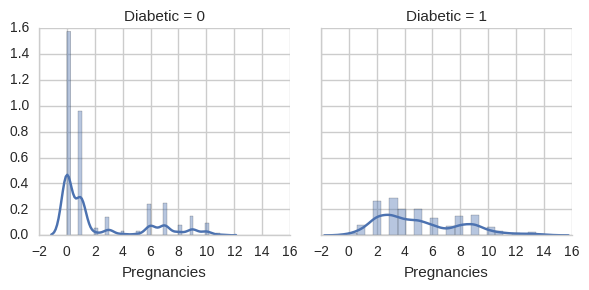

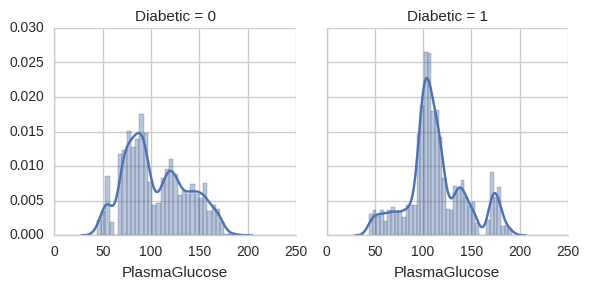

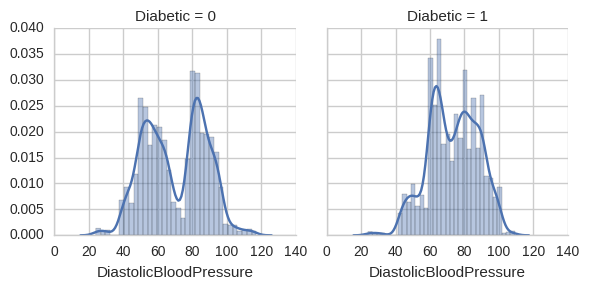

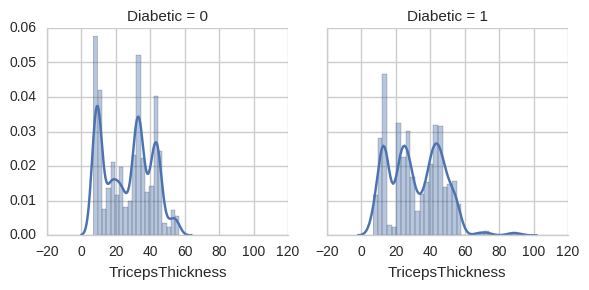

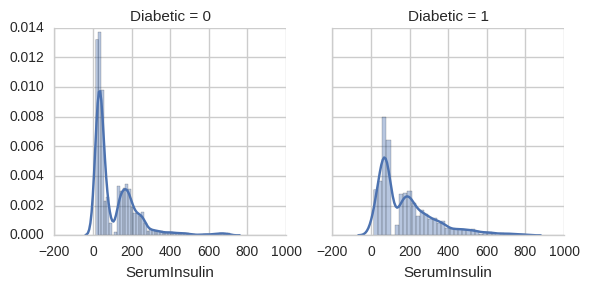

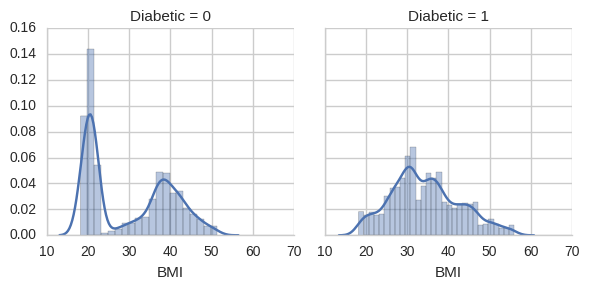

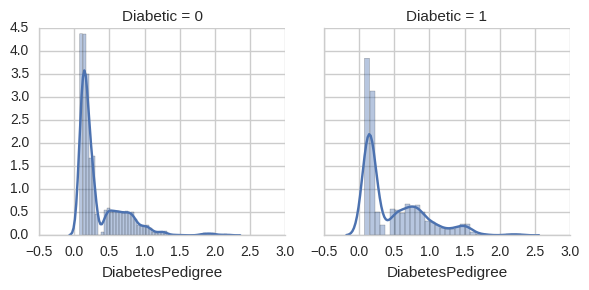

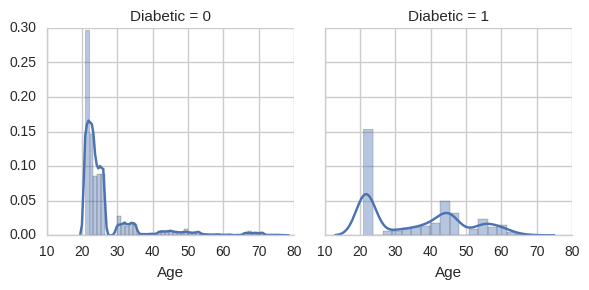

In [15]:
%matplotlib inline

import seaborn as sns
import numpy as np

sns.set_style('whitegrid')


def createfacetgrid(df):    
    for col in df.columns.tolist()[:-1]:
        if df[col].dtype in [np.int64, np.int32, np.float64] and col != 'Diabetic' and col != 'PatientID':
            g = sns.FacetGrid(df, col = 'Diabetic')
            g.map(sns.distplot, col)
        
createfacetgrid(frame)

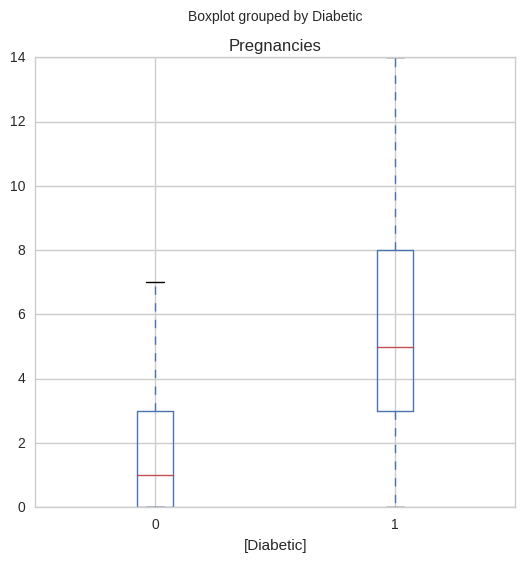

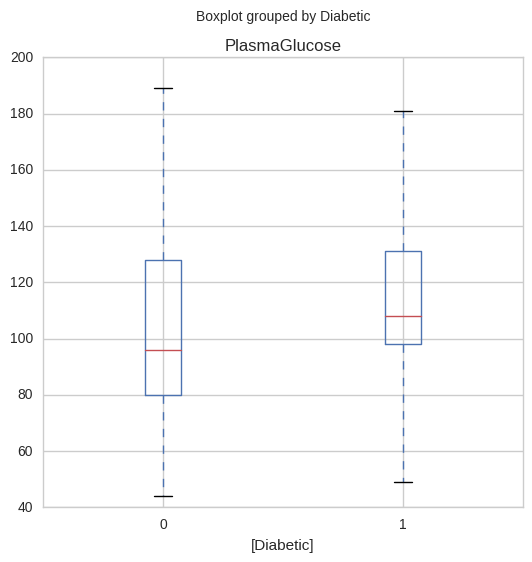

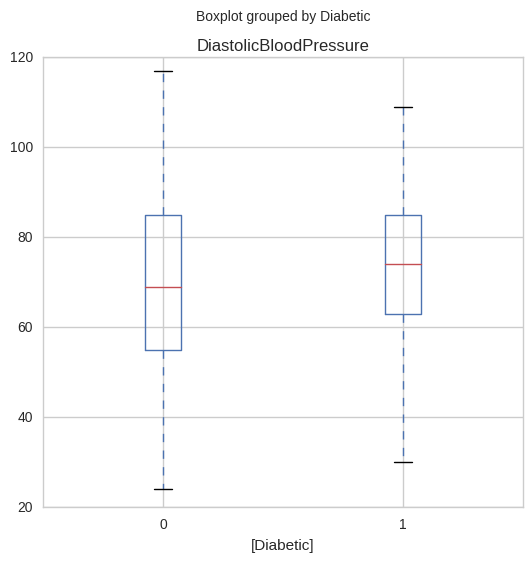

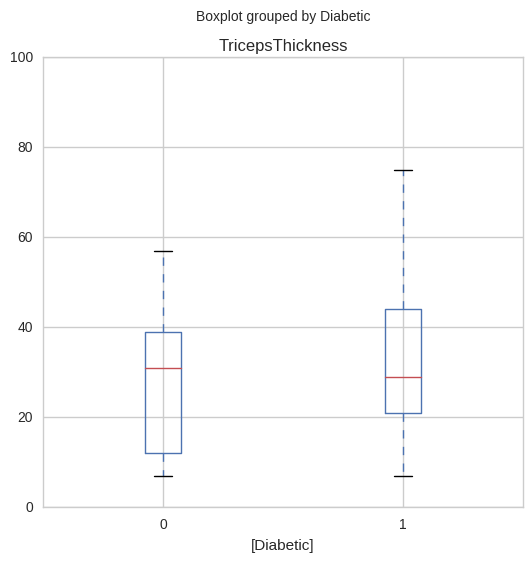

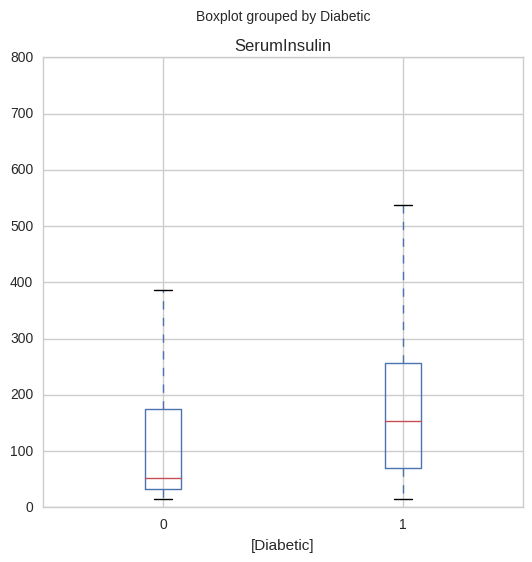

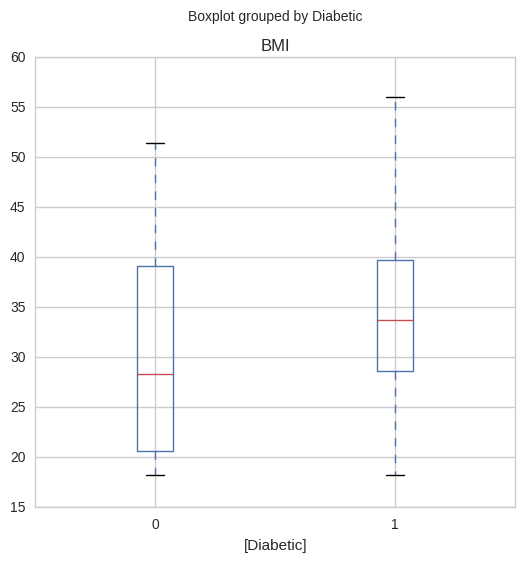

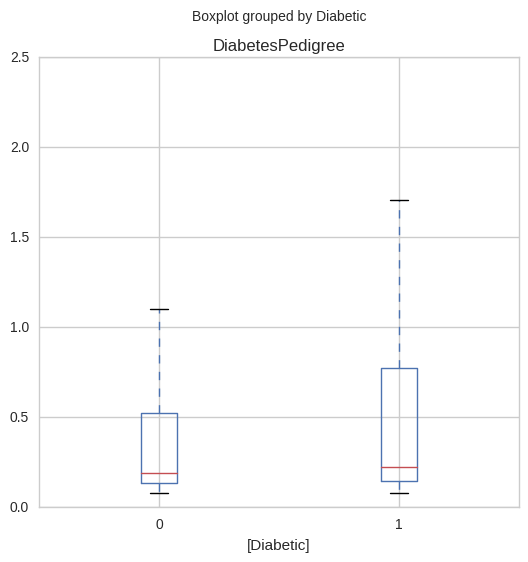

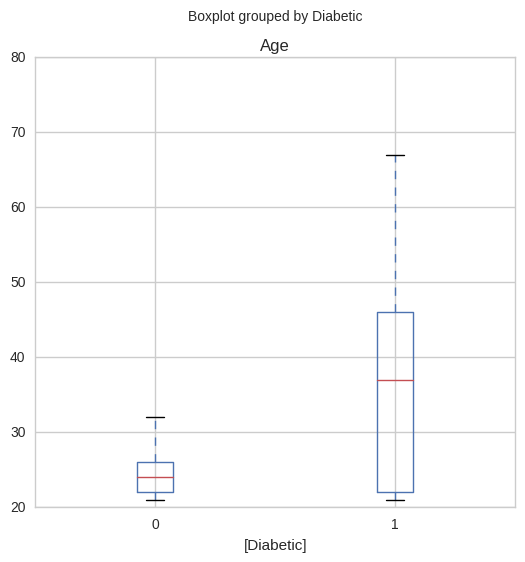

In [19]:
import matplotlib.pyplot as plt
def create_box_plot(df):
    for col in df.columns.tolist()[:-1]:
        if df[col].dtype in [np.int32, np.int64, np.float64] and col != 'Diabetic' and col != 'PatientID':
            fig = plt.figure(figsize = (6, 6))
            fig.clf()
            df.boxplot(column = col, ax = fig.gca(), by = ['Diabetic'])
    
create_box_plot(frame)